In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive/TFM/

/content/gdrive/My Drive/TFM


In [ ]:
import os
import glob


import numpy as np
import pandas as pd
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import cufflinks as cf

import seaborn as sns

!pip install --upgrade mplfinance
import mplfinance as mpf

from scipy import stats

     |████████████████████████████████| 62 kB 928 kB/s 


#aux methods

In [ ]:
#Serial correlation aka auto correlation

def returns(candles_close_prices):
    #return pd.Series(np.diff(candles_close_prices))
    return np.log(candles_close_prices).diff().dropna()

#Dagostion Pearson test for several assets. Tick and Time bars for several timeframes

In [ ]:

column_names = ['Volume-1','Volume-2','Volume-3','Volume-4','Volume-5','Dollar-1','Dollar-2', 'Dollar-3','Dollar-4', 'Dollar-5' ]
row_names = ['ADAUSDT','BNBUSDT','EOSUSDT','DOTUSDT','ETHUSD','LINKUSDT','LTCUSD','XTZUSDT','XBTUSD','XRPUSD']

def bar(xs, y): return np.int64(xs / y) * y

correlations = pd.DataFrame(columns = column_names,index = row_names )

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_0/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_1/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left",end='', flush=True)



In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_2/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_3/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left",end='', flush=True)


##ADA

In [ ]:
data1 = data[data.symbol == 'ADAUSDTH21']
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  60.  110.  200. 1100. 2700.] 
 [  34000.   69000.  137700.  661100. 1650000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ADAUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EOSUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOTUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETHUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LINKUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##BNB

In [ ]:
data1 = data[data.symbol == 'BNBUSDTH21']
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  40.   70.  100.  700. 1700.] 
 [  50000.   99000.  198000.  950500. 2380000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['BNBUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOTUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETHUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LINKUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##EOS

In [ ]:
data1 = data[data.symbol == 'EOSUSDTH21']
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  480.   950.  1900.  9100. 22900.] 
 [ 11000.  23000.  45700. 219400. 550000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['EOSUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETHUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LINKUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##DOT

In [ ]:
data1 = data[data.symbol == 'DOTUSDTH21']
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[ 160.  320.  600. 3100. 7800.] 
 [  31000.   63000.  126000.  604800. 1510000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['DOTUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LINKUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##ETH

In [ ]:
data1 = data[data.symbol == 'ETHUSD']
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  52340.  104670.  209300. 1004800. 2512100.] 
 [5.685000e+06 1.136900e+07 2.273840e+07 1.091443e+08 2.728600e+08]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['ETHUSD','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##LINK

In [ ]:
data1 = data[data.symbol == 'LINKUSDT'] 
#del(data)
# timestamp parsing
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  800.  1610.  3200. 15400. 38500.] 
 [ 116000.  233000.  465900. 2236200. 5590000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LINKUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##LTC

In [ ]:
data1 = data[data.symbol == 'LTCUSD']
#del(data)
# timestamp parsing 
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  9580.  19150.  38300. 183800. 459600.] 
 [ 191000.  383000.  766000. 3676600. 9190000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['LTCUSD','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##XTZ

In [ ]:
data1 = data[data.symbol == 'XTZUSDTH21']
# timestamp parsing 
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  310.   610.  1200.  5900. 14700.] 
 [  7000.  15000.  29200. 140200. 350000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XTZUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,4.27192e-59,1.12932e-34,2.8083e-18,7.68754e-05,0.00709291,5.02777e-120,2.04712e-73,8.63462e-35,4.31274e-06,0.0225421
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##YFI

In [ ]:
data1 = data[data.symbol == 'YFIUSDTH21']
# timestamp parsing 
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
correlations.append(pd.Series(name='YFIUSDT'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,4.27192e-59,1.12932e-34,2.8083e-18,7.68754e-05,0.00709291,5.02777e-120,2.04712e-73,8.63462e-35,4.31274e-06,0.0225421
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  40.   70.  100.  700. 1800.] 
 [  7000.  15000.  29100. 139500. 350000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['YFIUSDT','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,4.27192e-59,1.12932e-34,2.8083e-18,7.68754e-05,0.00709291,5.02777e-120,2.04712e-73,8.63462e-35,4.31274e-06,0.0225421
XBTUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##XBT

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_0/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data1 = data[data.symbol == 'XBTUSD']
# timestamp parsing 
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_1/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data2 = data[data.symbol == 'XBTUSD']
# timestamp parsing 
data2['timestamp'] = data2.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_2/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data3 = data[data.symbol == 'XBTUSD']
# timestamp parsing 
data3['timestamp'] = data3.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_3/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data4 = data[data.symbol == 'XBTUSD']
# timestamp parsing 
data4['timestamp'] = data4.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
data1.append(data2)
del(data2)
data1.append(data3)
del(data3)
data1.append(data4)
del(data4)

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[2.1944590e+07 4.3889170e+07 8.7778300e+07 4.2133600e+08 1.0533401e+09] 
 [2.19450e+07 4.38890e+07 8.77783e+07 4.21336e+08 1.05334e+09]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XBTUSD','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,4.27192e-59,1.12932e-34,2.8083e-18,7.68754e-05,0.00709291,5.02777e-120,2.04712e-73,8.63462e-35,4.31274e-06,0.0225421
XBTUSD,0,0,0,6.14745e-109,9.55895e-38,0,0,0,6.14745e-109,7.66947e-37
XRPUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##XRP

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_0/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_0/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_0/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data1 = data[data.symbol == 'XRPUSD']
# timestamp parsing 
data1['timestamp'] = data1.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_1/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_1/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_1/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data2 = data[data.symbol == 'XRPUSD']
# timestamp parsing 
data2['timestamp'] = data2.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:

# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_2/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_2/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_2/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data3 = data[data.symbol == 'XRPUSD']
# timestamp parsing 
data3['timestamp'] = data3.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))

In [ ]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.DataFrame()
for i,file in enumerate(glob.glob("data/test/Data_3/*.csv")):
  if i == 0:
    data = data.append(pd.read_csv(file))
    print('Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left", end='')
  else:
    data = data.append(pd.read_csv(file))
    print('\r Percentge of files already Loaded:',round((i/len(glob.glob("data/test/Data_3/*.csv")))*100,1), '%. There are', len(glob.glob("data/test/Data_3/*.csv"))-i, "files left",end='', flush=True)


In [ ]:
data4 = data[data.symbol == 'XRPUSD']
# timestamp parsing 
data4['timestamp'] = data4.timestamp.map(lambda t: datetime.strptime(t[:-3], "%Y-%m-%dD%H:%M:%S.%f"))


In [ ]:
data1.append(data2)
del(data2)
data1.append(data3)
del(data3)
data1.append(data4)
del(data4)

In [ ]:
Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first', 'foreignNotional':'sum' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp','foreignNotional']
avg_dly_dollar = np.mean(Time_bars_1d['foreignNotional'])

avg_15m_dollar = np.round(avg_dly_dollar/96,decimals=-3)

avg_30m_dollar = np.round(avg_dly_dollar/48, decimals = -3)

avg_1h_dollar = np.round(avg_dly_dollar/24,decimals=-2)

avg_4h_dollar = np.round(avg_dly_dollar/5,decimals=-2)

avg_12h_dollar = np.round(avg_dly_dollar/2,decimals=-4)

avg_dollars = np.array([avg_15m_dollar, avg_30m_dollar, avg_1h_dollar, avg_4h_dollar, avg_12h_dollar])



Time_bars_1d = data1.groupby(pd.Grouper(key="timestamp", freq="1d")).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first' })
Time_bars_1d.columns = ['open','high','low','close','size','timestamp']
avg_dly_volume = np.mean(Time_bars_1d['size'])

avg_15m_volume = np.round(avg_dly_volume/96,decimals=-1)

avg_30m_volume = np.round(avg_dly_volume/48, decimals = -1)

avg_1h_volume = np.round(avg_dly_volume/24,decimals=-2)

avg_4h_volume = np.round(avg_dly_volume/5,decimals=-2)

avg_12h_volume = np.round(avg_dly_volume/2,decimals=-2)

avg_volumes = np.array([avg_15m_volume, avg_30m_volume, avg_1h_volume, avg_4h_volume, avg_12h_volume])



print(avg_volumes,'\n',avg_dollars)

[  89860.  179720.  359400. 1725300. 4313300.] 
 [  849000.  1697000.  3394200. 16292100. 40730000.]


In [ ]:
Volume_bars_50 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_50.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Volume-1'] = stats.normaltest(Volume_bars_50['close'])[1]


Volume_bars_100 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_100.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Volume-2'] = stats.normaltest(Volume_bars_100['close'])[1]


Volume_bars_500 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Volume-3'] = stats.normaltest(Volume_bars_500['close'])[1]


Volume_bars_1000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Volume-4'] = stats.normaltest(Volume_bars_1000['close'])[1]


Volume_bars_5000 = data1.groupby(bar(np.cumsum(data1['size']), avg_volumes[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Volume_bars_5000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Volume-5'] = stats.normaltest(Volume_bars_5000['close'])[1]



Dollar_bars_500 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[0])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_500.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Dollar-1'] = stats.normaltest(Dollar_bars_500['close'])[1]


Dollar_bars_1000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[1])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Dollar-2'] = stats.normaltest(Dollar_bars_1000['close'])[1]


Dollar_bars_10000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[2])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_10000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Dollar-3'] = stats.normaltest(Dollar_bars_10000['close'])[1]


Dollar_bars_100000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[3])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_100000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Dollar-4'] = stats.normaltest(Dollar_bars_100000['close'])[1]

Dollar_bars_1000000 = data1.groupby(bar(np.cumsum(data1['foreignNotional']), avg_dollars[4])).agg({'price': 'ohlc', 'size': 'sum', 'timestamp': 'first'})
Dollar_bars_1000000.columns = ['open','high','low','close','size','timestamp']
correlations.at['XRPUSD','Dollar-5'] = stats.normaltest(Dollar_bars_1000000['close'])[1]


correlations


,Volume-1,Volume-2,Volume-3,Volume-4,Volume-5,Dollar-1,Dollar-2,Dollar-3,Dollar-4,Dollar-5
ADAUSDT,2.33037e-45,3.75976e-26,1.35191e-14,0.00436602,0.141498,5.19659e-56,1.45235e-29,1.3895e-15,0.00103474,0.0516419
BNBUSDT,2.67099e-39,3.45048e-24,8.542e-18,0.00409714,0.177054,4.56948e-50,8.36342e-32,5.37481e-17,0.00014001,0.0124504
EOSUSDT,0,0,1.11114e-99,1.90121e-12,0.000229064,0,0,0,4.93999e-264,5.57691e-11
DOTUSDT,0.103968,0.473596,0.739621,0.848059,0.825304,0.0538927,0.251957,0.512031,0.804913,0.980885
ETHUSD,0,4.193e-206,8.37254e-104,5.2536e-22,3.45664e-09,0,6.49534e-173,1.22761e-86,1.59661e-18,3.1566e-08
LINKUSDT,3.75762e-71,1.23107e-34,2.77822e-17,0.00039554,0.0318504,2.7417e-39,5.86709e-20,4.10805e-10,0.0135511,0.180369
LTCUSD,0,6.11652e-194,1.67747e-98,1.3387e-21,2.40629e-09,6.60584e-208,1.59497e-105,4.16059e-53,1.32745e-11,2.44781e-05
XTZUSDT,4.27192e-59,1.12932e-34,2.8083e-18,7.68754e-05,0.00709291,5.02777e-120,2.04712e-73,8.63462e-35,4.31274e-06,0.0225421
XBTUSD,0,0,0,6.14745e-109,9.55895e-38,0,0,0,6.14745e-109,7.66947e-37
XRPUSD,0,0,0,1.5351e-69,1.57084e-25,0,0,0,1.65622e-226,3.36415e-69


#Heatmap

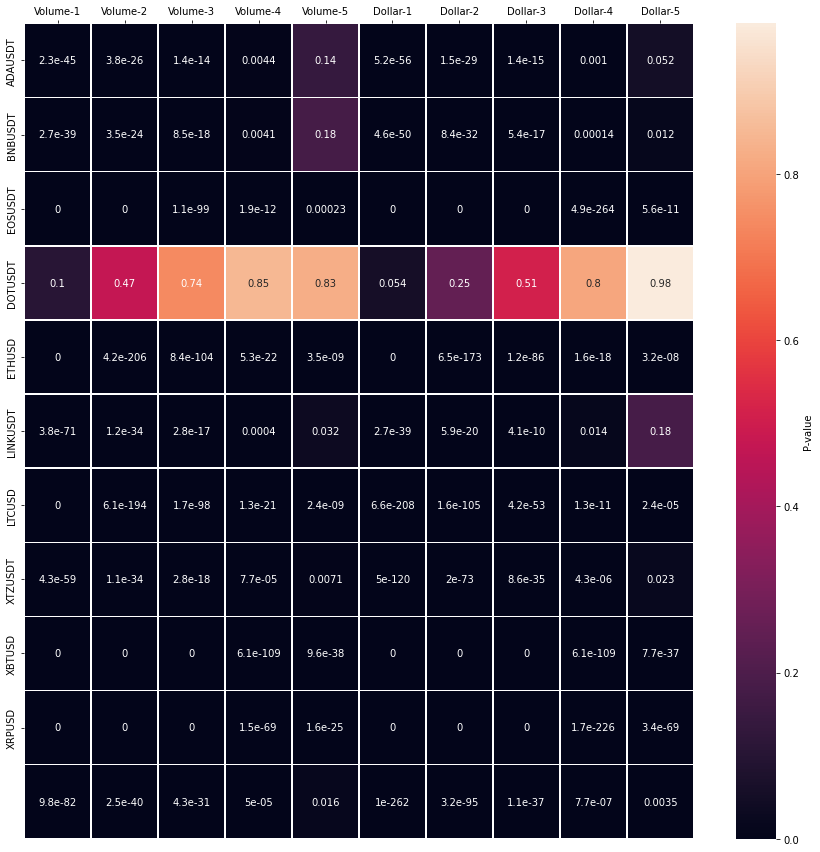

In [ ]:
cormat = np.array(correlations,dtype='float64')

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
corrmat =  sns.heatmap(cormat, annot = True, linewidths=.5, ax=ax, xticklabels=column_names,
                       yticklabels=row_names,  cbar_kws={'label': 'P-value'})

ax.xaxis.set_ticks_position('top')



In [ ]:
from google.colab import files
fig = corrmat.get_figure()
fig.savefig('Dagostino_Time_Volume.png')
